### Finding the most used words in the data for Movie and Anime Subreddits

In [16]:
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

In [17]:
import plotly.graph_objects as go
import pandas as pd

# Your data
data = {'word': ['movie', 'like', 'look', 'watch', 'im', 'film', 'good', 'see', 'love', 'something'],
        'count': [72187, 27869, 17926, 17677, 15842, 14465, 13604, 10841, 9366, 8858]}

df = pd.DataFrame(data)

# Create a Plotly table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Most Occured Words', 'Word Count'],
                fill_color='#FF4301',
                font=dict(color='white', size=12)),
    cells=dict(values=[df['word'], df['count']])
)])

# Update layout
fig.update_layout(
    title='Word Count for Movie Reddit Submission',
    margin=dict(l=0, r=0, t=50, b=0),
    paper_bgcolor="White",
    width=800, 
    height=300 
)

fig.write_html(f"../../data/plots/word_count_table_movie.html")

# Show the figure
fig.show()


In [18]:
data2 = {'word': ['anime', 'like', 'watch', 'look', 'im', 'good', 'one', 'something', 'mc', 'character'],
         'count': [73632, 45544, 34677, 23720, 23468, 19125, 17144, 16997, 15713, 14876]}

df2 = pd.DataFrame(data2)

In [19]:
# Create a Plotly table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Most Occured Words', 'Word Count'],
                fill_color='#ff9200',
                font=dict(color='white', size=12)),
    cells=dict(values=[df2['word'], df2['count']])
)])

# Update layout
fig.update_layout(
    title='Word Count for Anime Reddit Submission',
    margin=dict(l=0, r=0, t=50, b=0),
    paper_bgcolor="White",
    width=800, 
    height=300 
)

fig.write_html(f"../../data/plots/word_count_table_anime.html")

# Show the figure
fig.show()



Looking at the words people use the most, it seems like people on Reddit really enjoy chatting about their favorite anime and movies. Now, we're going to dig into the comments and pick out the names of the movies and anime that everyone is talking about the most. This way, we can find out which ones are super popular among the community.

MOST HIGLY RATED MOVIES

In [2]:
import pandas as pd
import altair as alt

In [82]:
positive_movies = pd.read_csv("../../data/csv/20_positive_movieReviews.csv")

In [83]:
positive_movies.head(5)

,title,average_positive_score,average_negative_score,num_reviews,normalized_positive_score,normalized_negative_score,weighted_rating
0,Jim Allison: Breakthrough,1.000000,8.531452e-22,48,48.000000,4.095097e-20,0.980967
1,Hava Nagila (The Movie),0.986757,1.324329e-02,116,114.463778,1.536221e+00,0.978951
2,Trifling Women,0.999248,7.515981e-04,44,43.966930,3.307032e-02,0.978692
3,Blinky Bill the Movie,0.998073,1.927482e-03,44,43.915191,8.480921e-02,0.977614
4,Molly's Theory of Relativity,0.999998,1.942952e-06,40,39.999922,7.771807e-05,0.977505


In [84]:
#add a column rank from 1 to 20
positive_movies['rank'] = positive_movies.index + 1
positive_movies['rating'] = positive_movies['weighted_rating']*100
positive_movies = positive_movies.nlargest(10, 'rating')

In [93]:
# Creating the Altair bar chart
chart = alt.Chart(positive_movies).mark_bar(color = '#006400',opacity=0.5).encode(
    y=alt.Y('title', title='Movie Title', sort='-x'),
    x=alt.X('rating', title='Movie Rating', scale=alt.Scale(domain=[95, 99])),
    tooltip=['title', 'rating']
).properties(
    title='Movies with the Highest Positive Ratings',
    width=800,
    height=400
)


In [94]:
# Configuring title font size
chart = chart.configure_title(
    fontSize=20  # Adjust the title font size as needed
)

# Configuring axis label font size
chart = chart.configure_axis(
    labelFontSize=14,
    titleFontSize=16
)

In [95]:
chart.save('../../data/plots/positive_rating_movies.html')

In [96]:
chart

alt.Chart(...)

In [97]:
negative_movies = pd.read_csv('../../data/csv/20_negative_movieReviews.csv')

In [98]:
negative_movies['rating'] = negative_movies['weighted_rating']*100
negative_movies = negative_movies.nlargest(10, 'rating')

In [99]:
negative_movies.head()

,title,average_positive_score,average_negative_score,num_reviews,normalized_positive_score,normalized_negative_score,weighted_rating,rating
0,Dinner With the President: A Nation's Journey,0.001345,0.998655,12,0.016140,11.983860,0.810848,81.084789
1,Fangs,0.000113,0.999887,8,0.000903,7.999097,0.749067,74.906688
2,Elephant Tales,0.002093,0.997907,8,0.016745,7.983255,0.747747,74.774676
3,Arisaka,0.005490,0.994510,8,0.043917,7.956083,0.745482,74.548237
4,The Phantom Planet,0.009694,0.990306,8,0.077551,7.922449,0.742680,74.267956


In [100]:
# Creating the Altair bar chart
chart_neg = alt.Chart(negative_movies).mark_bar(color = '#8B0000',opacity=0.5).encode(
    y=alt.Y('title', title='Movie Title', sort='-x'),
    x=alt.X('rating', title='Movie Rating', scale=alt.Scale(domain=[60, 85])),
    tooltip=['title', 'rating']
).properties(
    title='Movies with the Highest Negative Ratings',
    width=800,
    height=400
)


In [101]:
# Configuring title font size
chart_neg = chart_neg.configure_title(
    fontSize=20  # Adjust the title font size as needed
)

# Configuring axis label font size
chart_neg = chart_neg.configure_axis(
    labelFontSize=14,
    titleFontSize=16
)

In [102]:
chart_neg.save('../../data/plots/negative_rating_movies.html')

/Users/sangeetha/opt/anaconda3/envs/anly503/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


In [103]:
chart_neg

alt.Chart(...)

In [77]:
suggested_df = pd.read_csv('../../data/csv/sentiment_of_suggestions.csv')

In [78]:
suggested_df.head()

,title,weighted_rating,count
0,Hereditary,0.678031,2733
1,Parasite,0.824935,2578
2,Interstellar,0.890809,2557
3,Alien,0.697572,2489
4,Prisoners,0.767526,2478


In [25]:
top_movies = suggested_df.nlargest(10, 'count')
top_movies['log_count'] = np.log(suggested_df['count'])

In [45]:
top_movies

,title,weighted_rating,count,log_count,scaled_count
0,Hereditary,0.678031,2733,7.913155,142876.054106
1,Parasite,0.824935,2578,7.854769,130895.395458
2,Interstellar,0.890809,2557,7.846590,129299.275686
3,Alien,0.697572,2489,7.819636,124175.908167
4,Prisoners,0.767526,2478,7.815207,123353.635342
5,The Thing,0.763018,2468,7.811163,122607.696463
6,Midsommar,0.754184,2446,7.802209,120971.949377
7,Arrival,0.911839,2375,7.772753,115743.182845
8,Fight Club,0.816432,2338,7.757051,113049.009160
9,Oldboy,0.711642,2337,7.756623,112976.487611


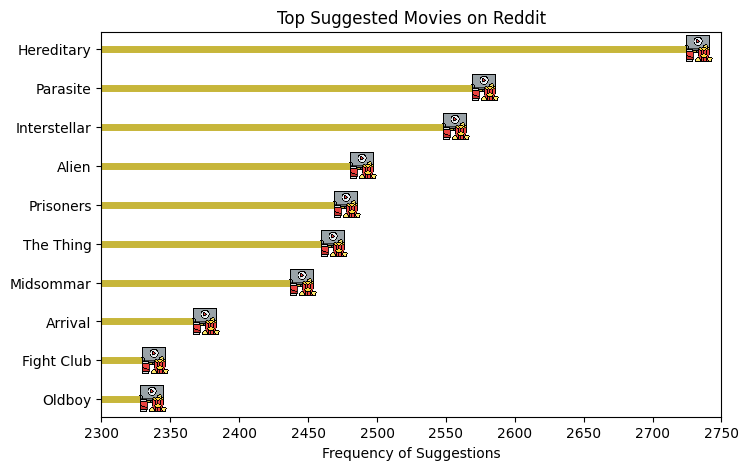

In [180]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
from PIL import Image

# Given data
data = top_movies

# Load movie icon
icon_path = 'movie-icon.png'  
movie_icon = Image.open(icon_path)
imagebox = OffsetImage(movie_icon, zoom=0.04)  # to resize the icon


# Sort the dataframe by 'count' to ensure the plot is ordered correctly
df_sorted = df.sort_values(by='count', ascending=True)

# Creating the lollipop plot with movie icons
fig, ax = plt.subplots(figsize=(8, 5))

# Draw horizontal lines and place the movie icon on the plot
for x0, y0 in zip(df_sorted['count'], df_sorted['title']):
    ax.hlines(y=y0, xmin=2300, xmax=x0, color='#c1ae24', alpha=0.9, linewidth=5)
    ab = AnnotationBbox(imagebox, (x0, y0), frameon=False, box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

# Set the x-axis limits from 2300 to 2750
ax.set_xlim(2300, 2750)

# Add titles and labels
plt.title('Top Suggested Movies on Reddit')
plt.xlabel('Frequency of Suggestions')

plt.yticks(df_sorted['title'])

#save to html
plt.savefig('../../data/plots/top_suggested_movies.png', dpi =300)

# Show the plot
plt.show()


In [79]:
suggested_df.head()

,title,weighted_rating,count
0,Hereditary,0.678031,2733
1,Parasite,0.824935,2578
2,Interstellar,0.890809,2557
3,Alien,0.697572,2489
4,Prisoners,0.767526,2478


In [117]:
suggested_df['rating'] = suggested_df['weighted_rating']*100

In [208]:
# import plotly.graph_objects as go
# import pandas as pd

# data = suggested_df.nlargest(10, 'count')
# df = data.sort_values(by='count', ascending=False)

# # Creating the lollipop plot
# fig = go.Figure()

# # Add lines (sticks) for each lollipop with updated color and width
# for title, rating in zip(df['title'], df['rating']):
#     fig.add_trace(go.Scatter(
#         x=[title, title], 
#         y=[60, rating], 
#         mode='lines',
#         line=dict(color='#c1ae24', width=5)  # Updated color and width
#     ))

# # Add scatter plot points (heads)
# fig.add_trace(go.Scatter(
#     x=df['title'], 
#     y=df['rating'], 
#     mode='markers',
#     marker=dict(color='blue', size=10), 
#     name='Rating'
# ))

# # Customize the layout
# fig.update_layout(
#     title='Review Ratings for Top Suggested Movies',
#     title_x=0.5,
#     xaxis_title='Movie Title',
#     yaxis_title='Movie Rating',
#     yaxis_range=[60, 100],
#     plot_bgcolor='white',
#     showlegend=False,
#     xaxis=dict(showline=True, linecolor='black', linewidth=2),
#     yaxis=dict(showline=True, linecolor='black', linewidth=2),
#     xaxis_showgrid=False,
#     yaxis_showgrid=False,
#     width=900,  # Set the width of the figure
#     height=560 
# )

# # Add images as lollipop heads 
# image_url = "revie-icon.svg" 
# image_size_x = 0.4  # "zoom in" on the image 
# image_size_y = 10  
# for title, rating in zip(df['title'], df['rating']):
#     fig.add_layout_image(
#         dict(
#             source=image_url,
#             xref="x",
#             yref="y",
#             x=title,
#             y=rating,
#             sizex=image_size_x,
#             sizey=image_size_y,
#             xanchor="center",
#             yanchor="middle"
#         )
#     )
    
# # Show the plot
# fig.show()


In [209]:
# import plotly.graph_objects as go
# import pandas as pd

# # Assuming 'data' is your DataFrame with movie data
# data = top_movies  # Replace with your actual DataFrame
# df_sorted = data.sort_values(by='count', ascending=True)

# # Creating the lollipop plot
# fig = go.Figure()

# # Add lines (sticks) for each lollipop
# for title, count in zip(df_sorted['title'], df_sorted['count']):
#     fig.add_trace(go.Scatter(x=[2300, count], y=[title, title], mode='lines',
#                              line=dict(color='#c1ae24', width=5)))

# # Add scatter plot points (heads) - these will be replaced by images
# fig.add_trace(go.Scatter(x=df_sorted['count'], y=df_sorted['title'], mode='markers',
#                          marker=dict(color='rgba(0,0,0,0)', size=1)))  # Invisible markers

# # Add images as lollipop heads
# image_url = "movie-icon.png" 
# for title, count in zip(df_sorted['title'], df_sorted['count']):
#     fig.add_layout_image(
#         dict(
#             source=image_url,
#             xref="x",
#             yref="y",
#             x=count,
#             y=title,
#             sizex=20,  # Adjust the size as needed
#             sizey=2,  # Adjust the size as needed
#             xanchor="center",
#             yanchor="middle"

#         )
#     )

# # Customize the layout
# fig.update_layout(
#     title='Top Suggested Movies on Reddit',
#     title_x=0.5,
#     xaxis_title='Frequency of Suggestions',
#     yaxis_title='Movie Title',
#     xaxis_range=[2300, 2750],
#     plot_bgcolor='white',
#     showlegend=False,
#     xaxis=dict(showline=True, linecolor='black', linewidth=2),
#     yaxis=dict(showline=True, linecolor='black', linewidth=2),
#     xaxis_showgrid=False,
#     yaxis_showgrid=False,
#     width=800,  # Set the width of the figure
#     height=550 
# )

# # Save the plot as HTML
# fig.write_html('../../data/plots/top_suggested_movies.html')

# # Show the plot
# fig.show()


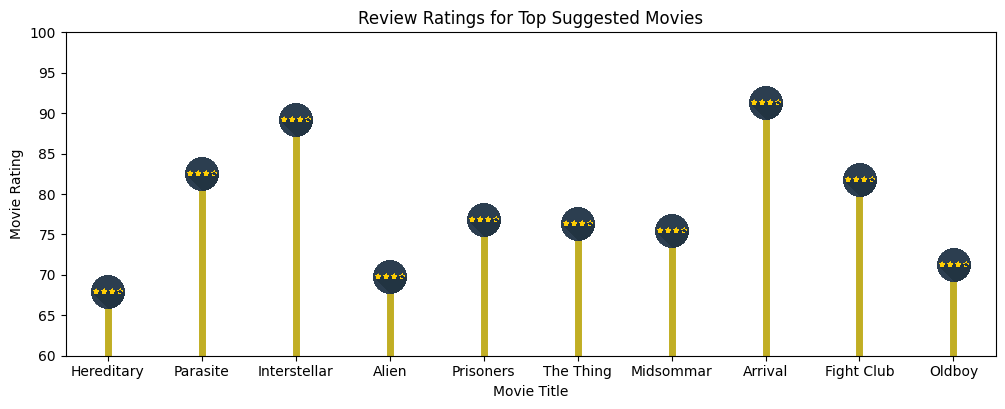

In [221]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

# Sample data - replace with your actual data
data = suggested_df.nlargest(10, 'count')
df = data.sort_values(by='count', ascending=False)

# Load movie icon
icon_path = 'review-icon.png'  # Path to your icon image
movie_icon = Image.open(icon_path)
imagebox = OffsetImage(movie_icon, zoom=0.03)  # Adjust the zoom level

# Creating the lollipop plot
fig, ax = plt.subplots(figsize=(12, 4.2))  # Adjust the size as needed

# Add lines (sticks) for each lollipop
for title, rating in zip(df['title'], df['rating']):
    ax.plot([title, title], [60, rating], color='#c1ae24', linewidth=5)

# Add custom icons as lollipop heads
for title, rating in zip(df['title'], df['rating']):
    ab = AnnotationBbox(imagebox, (title, rating), frameon=False)
    ax.add_artist(ab)

# Customize the layout
ax.set_title('Review Ratings for Top Suggested Movies')
ax.set_xlabel('Movie Title')
ax.set_ylabel('Movie Rating')
ax.set_ylim(60, 100)
ax.set_facecolor('white')
ax.grid(False)

#save the plot
plt.savefig('../../data/plots/review_rating_of_top_movies.png', dpi =300)

# Show the plot
plt.show()
